In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
listings = pd.read_csv("/work/Datasets/listings.csv").drop(columns=['has_availability', 'weekly_price'])

In [ ]:
south = ["OK", "TX", "LA", "AR", "TN", "MS", "AL", "GA", "WV", "NC", "SC", "FL", "KY", "VA"]

In [ ]:
len(listings[(listings.state.isin(south))].host_id.unique())

13783

In [ ]:
listings = listings[(listings.review_scores_rating.fillna(0) > 0) & (listings.state.isin(south))].reset_index()

In [ ]:
listings

,index,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,...,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,zipcode
0,0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,...,House,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,28806.0
1,1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,...,Tent,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC,28806.0
2,4,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,...,House,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC,28806.0
3,5,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,2.5,Real Bed,4.0,5.0,strict,Asheville,...,House,9.0,8.0,9.0,8.0,78.0,8.0,Entire home/apt,NC,28806.0
4,6,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",16,1.0,Real Bed,1.0,1.0,flexible,Asheville,...,House,10.0,10.0,10.0,9.0,93.0,9.0,Private room,NC,28806.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,19103,6.0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1,2.0,Real Bed,2.0,2.0,moderate,New Orleans,...,Apartment,10.0,10.0,10.0,10.0,100.0,9.0,Entire home/apt,LA,70115
13940,19104,2.0,"{TV,""Cable TV"",""Air conditioning"",Kitchen,Heat...",21,1.0,Real Bed,1.0,1.0,flexible,New Orleans,...,House,10.0,9.0,10.0,7.0,90.0,9.0,Private room,LA,70129
13941,19105,6.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",29,2.0,Real Bed,3.0,5.0,moderate,New Orleans,...,House,10.0,10.0,10.0,8.0,98.0,9.0,Entire home/apt,LA,70129
13942,19106,8.0,"{TV,""Air conditioning"",""Wheelchair accessible""...",23,2.5,Real Bed,3.0,3.0,flexible,New Orleans,...,House,10.0,10.0,10.0,10.0,100.0,10.0,Entire home/apt,LA,70129


In [ ]:
id_col = listings[['id']]
id_col

,id
0,665257
1,2746729
2,156926
3,3767793
4,5927700
...,...
13939,15873973
13940,17902750
13941,10430455
13942,11816662


In [ ]:
listings = listings.drop(columns = ["index"])

In [ ]:
listings['price'] = listings['price'].str.replace(',', '').str.replace('$', '').astype(float)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,...,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,zipcode
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,2600734,...,House,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC,28806.0
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,4295819,...,Tent,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC,28806.0
2,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,746673,...,House,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC,28806.0
3,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,2.5,Real Bed,4.0,5.0,strict,Asheville,9385592,...,House,9.0,8.0,9.0,8.0,78.0,8.0,Entire home/apt,NC,28806.0
4,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",16,1.0,Real Bed,1.0,1.0,flexible,Asheville,27672030,...,House,10.0,10.0,10.0,9.0,93.0,9.0,Private room,NC,28806.0


In [ ]:
listings['instant_bookable'].value_counts()

f    10171
t     3773
Name: instant_bookable, dtype: int64

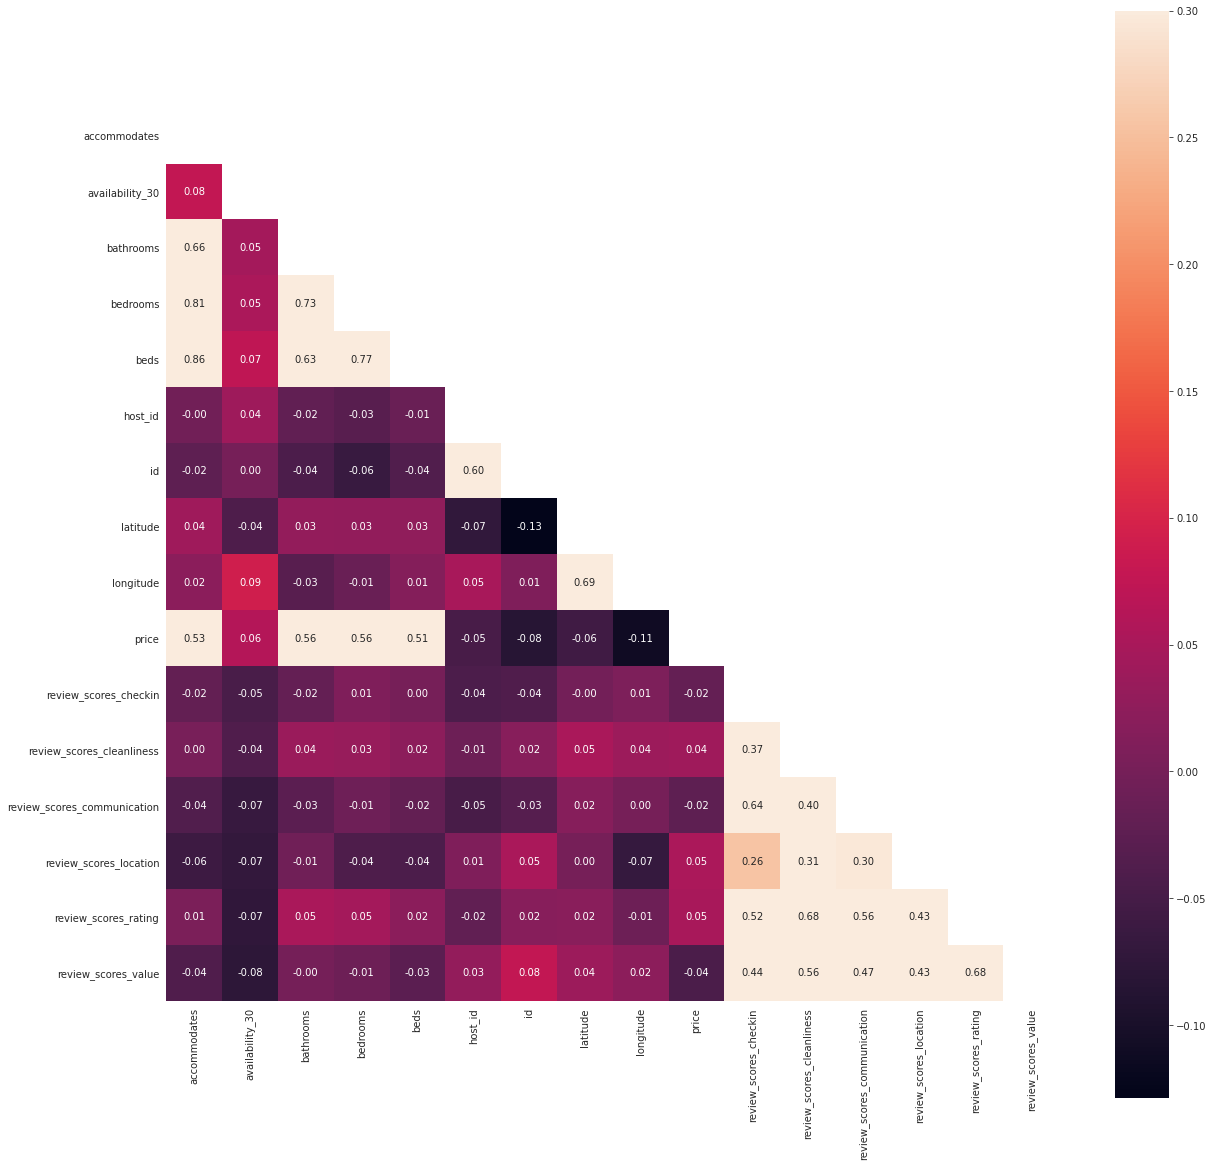

In [ ]:
corrmat = listings.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(20,20))
    ax = sns.heatmap(corrmat, mask = mask, vmax=.3, square=True, annot=True, fmt='.2f')

In [ ]:
review_scores_rating_corr = listings.corr()['review_scores_rating'].sort_values(ascending = False)[1:]
review_scores_rating_corr

review_scores_cleanliness      0.683090
review_scores_value            0.680812
review_scores_communication    0.557955
review_scores_checkin          0.522130
review_scores_location         0.432526
bathrooms                      0.051625
price                          0.049544
bedrooms                       0.045491
beds                           0.021305
latitude                       0.019664
id                             0.017529
accommodates                   0.005918
longitude                     -0.008930
host_id                       -0.020412
availability_30               -0.074726
Name: review_scores_rating, dtype: float64

In [ ]:
#for now
unnec_cols = ['latitude', 'longitude', 'zipcode', 'id', 'host_id']
listings = listings.drop(columns = unnec_cols)

In [ ]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,instant_bookable,...,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,f,...,105.0,House,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,f,...,125.0,Tent,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC
2,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,f,...,24.0,House,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC
3,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,2.5,Real Bed,4.0,5.0,strict,Asheville,f,...,105.0,House,9.0,8.0,9.0,8.0,78.0,8.0,Entire home/apt,NC
4,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",16,1.0,Real Bed,1.0,1.0,flexible,Asheville,t,...,65.0,House,10.0,10.0,10.0,9.0,93.0,9.0,Private room,NC


In [ ]:
listings.isna().mean()

accommodates                   0.000000
amenities                      0.000000
availability_30                0.000000
bathrooms                      0.001291
bed_type                       0.000000
bedrooms                       0.000574
beds                           0.000717
cancellation_policy            0.000000
city                           0.000000
instant_bookable               0.000000
metropolitan                   0.000000
name                           0.000072
price                          0.000000
property_type                  0.000000
review_scores_checkin          0.002940
review_scores_cleanliness      0.001291
review_scores_communication    0.001506
review_scores_location         0.003084
review_scores_rating           0.000000
review_scores_value            0.003299
room_type                      0.000000
state                          0.000000
dtype: float64

In [ ]:
#cols left with nans (that are not objects): bathrooms, bedrooms, beds, review scores stuff
(listings['bedrooms'] == 0).value_counts()

False    13248
True       696
Name: bedrooms, dtype: int64

In [ ]:
(listings['beds'] == 0).value_counts()

False    13944
Name: beds, dtype: int64

In [ ]:
(listings['bathrooms'] == 0).value_counts()

False    13896
True        48
Name: bathrooms, dtype: int64

In [ ]:
#For beds, bedrooms and bathrooms, we are going to put 0 since it is very likely that the listings without information about those features are those that do not have those features.
#For review scores cols, if there isn't a rating, it is likely that the host is new - we can put 0 as well
null_cols = ['bedrooms', 'bathrooms', 'beds', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
for col in null_cols:
    listings[col].fillna(0, inplace = True)
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,instant_bookable,...,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,Real Bed,1.0,1.0,moderate,Asheville,f,...,105.0,House,10.0,9.0,10.0,9.0,96.0,10.0,Entire home/apt,NC
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,Real Bed,1.0,2.0,strict,Asheville,f,...,125.0,Tent,10.0,10.0,10.0,9.0,96.0,9.0,Entire home/apt,NC
2,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,Real Bed,1.0,6.0,moderate,Asheville,f,...,24.0,House,10.0,9.0,9.0,9.0,93.0,10.0,Shared room,NC
3,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,2.5,Real Bed,4.0,5.0,strict,Asheville,f,...,105.0,House,9.0,8.0,9.0,8.0,78.0,8.0,Entire home/apt,NC
4,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",16,1.0,Real Bed,1.0,1.0,flexible,Asheville,t,...,65.0,House,10.0,10.0,10.0,9.0,93.0,9.0,Private room,NC


In [ ]:
listings.isna().mean()

accommodates                   0.000000
amenities                      0.000000
availability_30                0.000000
bathrooms                      0.000000
bed_type                       0.000000
bedrooms                       0.000000
beds                           0.000000
cancellation_policy            0.000000
city                           0.000000
instant_bookable               0.000000
metropolitan                   0.000000
name                           0.000072
price                          0.000000
property_type                  0.000000
review_scores_checkin          0.000000
review_scores_cleanliness      0.000000
review_scores_communication    0.000000
review_scores_location         0.000000
review_scores_rating           0.000000
review_scores_value            0.000000
room_type                      0.000000
state                          0.000000
dtype: float64

In [ ]:
#There are still categorical cols not ready for analysis yet
listings.select_dtypes(['object']).head()

,amenities,bed_type,cancellation_policy,city,instant_bookable,metropolitan,name,property_type,room_type,state
0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",Real Bed,moderate,Asheville,f,asheville,"Lovely cabin, great Asheville spot",House,Entire home/apt,NC
1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,strict,Asheville,f,asheville,Glamping w HOT TUB + AC!,Tent,Entire home/apt,NC
2,"{Internet,""Wireless Internet"",""Free Parking on...",Real Bed,moderate,Asheville,f,asheville,Mixed Dorm Bunk at BPS Hostel,House,Shared room,NC
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,strict,Asheville,f,asheville,Modern Home - Views - HOT TUB,House,Entire home/apt,NC
4,"{Internet,""Wireless Internet"",""Air Conditionin...",Real Bed,flexible,Asheville,t,asheville,Bright Suite with Sunroom,House,Private room,NC


In [ ]:
categorical_types = ['bed_type', 'cancellation_policy', 'instant_bookable', 'property_type', 'room_type']
listings[categorical_types] = listings[categorical_types].apply(lambda x: x.astype('category'), axis='rows')
listings[categorical_types].dtypes

bed_type               category
cancellation_policy    category
instant_bookable       category
property_type          category
room_type              category
dtype: object

In [ ]:
category_onehot_encoding = pd.get_dummies(listings[categorical_types])
category_onehot_encoding.head()

,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,...,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
category_onehot_encoding.shape

(13944, 46)

In [ ]:
listings = pd.concat([listings, category_onehot_encoding], axis ='columns').drop(categorical_types, axis='columns')
listings.head()

,accommodates,amenities,availability_30,bathrooms,bedrooms,beds,city,metropolitan,name,price,...,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2.0,"{""Wireless Internet"",""Air Conditioning"",Kitche...",0,1.0,1.0,1.0,Asheville,asheville,"Lovely cabin, great Asheville spot",105.0,...,0,0,0,0,0,0,0,1,0,0
1,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,1.0,1.0,2.0,Asheville,asheville,Glamping w HOT TUB + AC!,125.0,...,0,0,0,0,0,0,0,1,0,0
2,6.0,"{Internet,""Wireless Internet"",""Free Parking on...",25,2.5,1.0,6.0,Asheville,asheville,Mixed Dorm Bunk at BPS Hostel,24.0,...,0,0,0,0,0,0,0,0,0,1
3,10.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",17,2.5,4.0,5.0,Asheville,asheville,Modern Home - Views - HOT TUB,105.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",16,1.0,1.0,1.0,Asheville,asheville,Bright Suite with Sunroom,65.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
listings.shape

(13944, 63)

In [ ]:
#Need a different custom one hot encoding for the amenities column, 
#since it has a set of values for each row
import re
listings['amenities'] = listings['amenities'].apply(lambda x: re.sub('[^a-zA-Z,\/\s\d-]*', '', x).split(sep=','))

In [ ]:
listings['amenities']

0        [Wireless Internet, Air Conditioning, Kitchen,...
1        [TV, Cable TV, Internet, Wireless Internet, Ai...
2        [Internet, Wireless Internet, Free Parking on ...
3        [TV, Cable TV, Internet, Wireless Internet, Ai...
4        [Internet, Wireless Internet, Air Conditioning...
                               ...                        
13939    [TV, Wireless Internet, Air conditioning, Kitc...
13940    [TV, Cable TV, Air conditioning, Kitchen, Heat...
13941    [TV, Cable TV, Internet, Wireless Internet, Ai...
13942    [TV, Air conditioning, Wheelchair accessible, ...
13943    [TV, Wireless Internet, Air conditioning, Free...
Name: amenities, Length: 13944, dtype: object

In [ ]:
#Creating a flat list for all amenities entries
amenities_list = [item for sublist in listings['amenities'] for item in sublist]

In [ ]:
#Add up amenities counts
from collections import Counter
amenity_counts = Counter(amenities_list).most_common()

In [ ]:
#Let's see what these look like, look at the first 20
amenity_counts[0:20]

[('Heating', 13502),
 ('Wireless Internet', 13439),
 ('Kitchen', 12731),
 ('Essentials', 12437),
 ('TV', 11076),
 ('Shampoo', 10628),
 ('Washer', 10522),
 ('Dryer', 10448),
 ('Air conditioning', 10281),
 ('Internet', 10197),
 ('Hangers', 9272),
 ('Smoke detector', 9041),
 ('Iron', 8387),
 ('Free parking on premises', 7611),
 ('Family/kid friendly', 6733),
 ('Fire extinguisher', 6579),
 ('Laptop friendly workspace', 6318),
 ('Hair dryer', 6272),
 ('Cable TV', 5749),
 ('Carbon monoxide detector', 5614)]

In [ ]:
#Make a list of the amenities we're interested in
amenities_of_interest = [x[0] for x in amenity_counts[0:70]]

In [ ]:
amenities_of_interest

['Heating',
 'Wireless Internet',
 'Kitchen',
 'Essentials',
 'TV',
 'Shampoo',
 'Washer',
 'Dryer',
 'Air conditioning',
 'Internet',
 'Hangers',
 'Smoke detector',
 'Iron',
 'Free parking on premises',
 'Family/kid friendly',
 'Fire extinguisher',
 'Laptop friendly workspace',
 'Hair dryer',
 'Cable TV',
 'Carbon monoxide detector',
 '24-hour check-in',
 'First aid kit',
 'Air Conditioning',
 'translation missing enhostingamenity50',
 'Pets live on this property',
 'Free Parking on Premises',
 'Smoke Detector',
 'translation missing enhostingamenity49',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'Pool',
 'Pets allowed',
 'Dogs',
 'Hair Dryer',
 'Carbon Monoxide Detector',
 'Lock on bedroom door',
 'Laptop Friendly Workspace',
 'Self Check-In',
 'Safety card',
 'Breakfast',
 '24-Hour Check-in',
 'First Aid Kit',
 'Suitable for events',
 'Private entrance',
 'Indoor fireplace',
 'Gym',
 'Cats',
 'Elevator in building',
 'Safety Card',
 'Lockbox',
 'Keypad',
 'Indoor Fireplace',
 'W

In [ ]:
#Remove the unnecessary ones
amenities_of_interest.remove('translation missing enhostingamenity49')
amenities_of_interest.remove('translation missing enhostingamenity50')

In [ ]:
amenities_of_interest

['Heating',
 'Wireless Internet',
 'Kitchen',
 'Essentials',
 'TV',
 'Shampoo',
 'Washer',
 'Dryer',
 'Air conditioning',
 'Internet',
 'Hangers',
 'Smoke detector',
 'Iron',
 'Free parking on premises',
 'Family/kid friendly',
 'Fire extinguisher',
 'Laptop friendly workspace',
 'Hair dryer',
 'Cable TV',
 'Carbon monoxide detector',
 '24-hour check-in',
 'First aid kit',
 'Air Conditioning',
 'Pets live on this property',
 'Free Parking on Premises',
 'Smoke Detector',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'Pool',
 'Pets allowed',
 'Dogs',
 'Hair Dryer',
 'Carbon Monoxide Detector',
 'Lock on bedroom door',
 'Laptop Friendly Workspace',
 'Self Check-In',
 'Safety card',
 'Breakfast',
 '24-Hour Check-in',
 'First Aid Kit',
 'Suitable for events',
 'Private entrance',
 'Indoor fireplace',
 'Gym',
 'Cats',
 'Elevator in building',
 'Safety Card',
 'Lockbox',
 'Keypad',
 'Indoor Fireplace',
 'Wheelchair accessible',
 'Pets Allowed',
 'Hot tub',
 'Smoking allowed',
 'Suitable for

In [ ]:
len(amenities_of_interest)

68

In [ ]:
amenities_cols = []
amenities_col_names = []
for amenity in amenities_of_interest:
    amenities_cols.append([1 if x==True else 0 for x in listings['amenities'].apply(lambda x: amenity in x)])
    amenities_col_names.append(('amen_'+amenity))

In [ ]:
#dummy variable cols
amenity_columns = pd.DataFrame(amenities_cols).transpose()
amenity_columns.columns = amenities_col_names
amenity_columns.index = listings.index

In [ ]:
kitchen_amenities = [
    'Kitchen', 'Refrigerator', 'Dishes and silverware', 'Microwave',
    'Coffee maker', 'Stove', 'Cooking basics', 'Oven', 'Dishwasher',
    'BBQ grill', 'Breakfast'
]
cleaning_amenities = [
    'Shampoo', 'Hair dryer', 'Washer', 'Dryer', 'Iron', 'Hot water', 'Bathtub'
]
safety_amenities = [
    'Smoke detector', 'Carbon monoxide detector', 'Fire extinguisher',
    'First aid kit', 'Lock on bedroom door', 'Lockbox', 'Keypad',
    'Safety card', 'Smart lock', 'Doorman', 'Buzzer/wireless intercom'
]
household_amenities = [
    'Heating', 'Air Conditioning', 'Essentials', 'Laptop friendly workspace',
    'Free parking on premises', 'Free street parking', 'Private entrance',
    'Self check-in', 'No stairs or steps to enter', 'Long term stays allowed',
    'Family/kid friendly', 'Luggage dropoff allowed', 'Indoor fireplace',
    'Elevator', 'Pets allowed', 'Host greets you', 'Single level home',
    'Well-lit path to entrance', '24-hour check-in',
    'Pets live on this property', 'Wide entrance for guests',
    'Extra space around bed', 'Smoking allowed', 'Wide hallways',
    'Wide entrance', 'Room-darkening shades', 'Flat path to guest entrance',
    'Wide entryway', 'Suitable for events', 'Wheelchair Accessible'
]
bedroom_amenities = ['Hangers', 'Bed linens', 'Extra pillows and blankets']
electronics_amenities = [
    'Wireless Internet', 'TV', 'Cable TV', 'Internet', 'Ethernet connection'
]
extra_spaces_amenities = [
    'Patio or balcony', 'Pool', 'Garden or backyard', 'Hot tub', 'BBQ grill',
    'Private living room', 'Gym'
]

amenity_groups = [
    kitchen_amenities, cleaning_amenities, safety_amenities,
    household_amenities, bedroom_amenities, electronics_amenities,
    extra_spaces_amenities
]

In [ ]:
#Get counts for # of amenities within each category for each listing
amenity_group_cols = []
for group in amenity_groups:
    amenity_group_cols.append(listings['amenities'].apply(
    lambda x: len(set(group).intersection(set(x)))))

In [ ]:
amenity_group_columns = pd.DataFrame(amenity_group_cols).transpose()
amenity_group_columns.index = listings.index
amenity_group_columns.columns = [
    'amen_group_kitchen', 'amen_group_cleaning', 'amen_group_safety',
    'amen_group_household', 'amen_group_bedroom', 'amen_group_electronics',
    'amen_group_extra_spaces'
]

In [ ]:
#merge into main dataframe
listings = listings.merge(amenity_group_columns,how='left',left_index=True,right_index=True)

In [ ]:
listings['amenities_num'] = [len(x) for x in listings['amenities']]

In [ ]:
listings = listings.drop(columns=['amenities'])

In [ ]:
redundant_cols = []
for col in listings.columns:
    if listings[col].nunique() <= 10:
        redundant_cols.append(col)

redundant_cols
remove_cols = ['cancellation_policy_flexible','cancellation_policy_moderate','cancellation_policy_no_refunds',
'cancellation_policy_strict','cancellation_policy_super_strict_30','cancellation_policy_super_strict_60',
'instant_bookable_f','instant_bookable_t']
for col in remove_cols:
    redundant_cols.remove(col)

listings = listings.drop(columns=redundant_cols)

listings

,accommodates,availability_30,bathrooms,bedrooms,beds,city,name,price,review_scores_rating,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,amen_group_kitchen,amen_group_household,amenities_num
0,2.0,0,1.0,1.0,1.0,Asheville,"Lovely cabin, great Asheville spot",105.0,96.0,0,1,0,0,0,0,1,0,1,3,9
1,4.0,17,1.0,1.0,2.0,Asheville,Glamping w HOT TUB + AC!,125.0,96.0,0,0,0,1,0,0,1,0,1,2,11
2,6.0,25,2.5,1.0,6.0,Asheville,Mixed Dorm Bunk at BPS Hostel,24.0,93.0,0,1,0,0,0,0,1,0,0,1,7
3,10.0,17,2.5,4.0,5.0,Asheville,Modern Home - Views - HOT TUB,105.0,78.0,0,0,0,1,0,0,1,0,1,2,18
4,2.0,16,1.0,1.0,1.0,Asheville,Bright Suite with Sunroom,65.0,93.0,1,0,0,0,0,0,0,1,1,4,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13939,6.0,1,2.0,2.0,2.0,New Orleans,"Spacious House, Perfect Location Near Everything!",162.0,100.0,0,1,0,0,0,0,0,1,1,6,20
13940,2.0,21,1.0,1.0,1.0,New Orleans,Cozy 1 Bedroom With Everything!,65.0,90.0,1,0,0,0,0,0,0,1,1,2,13
13941,6.0,29,2.0,3.0,5.0,New Orleans,Big EZ Bungalow,200.0,98.0,0,1,0,0,0,0,1,0,1,6,16
13942,8.0,23,2.5,3.0,3.0,New Orleans,Blessed,300.0,100.0,1,0,0,0,0,0,1,0,1,4,12


In [ ]:
listings_final = pd.read_csv("/work/Datasets/listings_final.csv")
listings_final.head()

,Unnamed: 0,accommodates,availability_30,bathrooms,bedrooms,beds,price,review_scores_rating,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,amen_group_kitchen,amen_group_household,amenities_num,id
0,0,2.0,0,1.0,1.0,1.0,105.0,96.0,0,1,0,0,0,0,1,0,1,3,9,665257
1,1,4.0,17,1.0,1.0,2.0,125.0,96.0,0,0,0,1,0,0,1,0,1,2,11,2746729
2,2,6.0,25,2.5,1.0,6.0,24.0,93.0,0,1,0,0,0,0,1,0,0,1,7,156926
3,3,10.0,17,2.5,4.0,5.0,105.0,78.0,0,0,0,1,0,0,1,0,1,2,18,3767793
4,4,2.0,16,1.0,1.0,1.0,65.0,93.0,1,0,0,0,0,0,0,1,1,4,13,5927700


In [ ]:
listings_final = listings_final.drop(columns=['Unnamed: 0'])
listings_final.head()

,accommodates,availability_30,bathrooms,bedrooms,beds,price,review_scores_rating,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,amen_group_kitchen,amen_group_household,amenities_num,id
0,2.0,0,1.0,1.0,1.0,105.0,96.0,0,1,0,0,0,0,1,0,1,3,9,665257
1,4.0,17,1.0,1.0,2.0,125.0,96.0,0,0,0,1,0,0,1,0,1,2,11,2746729
2,6.0,25,2.5,1.0,6.0,24.0,93.0,0,1,0,0,0,0,1,0,0,1,7,156926
3,10.0,17,2.5,4.0,5.0,105.0,78.0,0,0,0,1,0,0,1,0,1,2,18,3767793
4,2.0,16,1.0,1.0,1.0,65.0,93.0,1,0,0,0,0,0,0,1,1,4,13,5927700


In [ ]:
listings_final = listings_final.drop(columns=['review_scores_rating'])

In [ ]:
feedback_score = pd.read_csv("/work/feedback_score.csv")
feedback_score.head()

,Unnamed: 0,listing_id,prob_positive_feedback
0,0,1001303,0.835443
1,1,10062315,NaN
2,2,10069202,0.856672
3,3,10069609,0.857143
4,4,10071238,0.791667


In [ ]:
feedback_score = feedback_score.drop(columns=['Unnamed: 0'])

In [ ]:
listings_final = pd.merge(listings_final, feedback_score, on='id',how='left')
listings_final.head()

,accommodates,availability_30,bathrooms,bedrooms,beds,price,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,instant_bookable_f,instant_bookable_t,amen_group_kitchen,amen_group_household,amenities_num,id,feedback_score,normalized_fbs
0,2.0,0,1.0,1.0,1.0,105.0,0,1,0,0,0,0,1,0,1,3,9,665257,NaN,NaN
1,4.0,17,1.0,1.0,2.0,125.0,0,0,0,1,0,0,1,0,1,2,11,2746729,NaN,NaN
2,6.0,25,2.5,1.0,6.0,24.0,0,1,0,0,0,0,1,0,0,1,7,156926,0.694658,1.142052
3,10.0,17,2.5,4.0,5.0,105.0,0,0,0,1,0,0,1,0,1,2,18,3767793,0.350846,-0.605389
4,2.0,16,1.0,1.0,1.0,65.0,1,0,0,0,0,0,0,1,1,4,13,5927700,NaN,NaN


In [ ]:
listings_final.dropna(inplace=True)
listings_final.isna().any()

accommodates                           False
availability_30                        False
bathrooms                              False
bedrooms                               False
beds                                   False
price                                  False
cancellation_policy_flexible           False
cancellation_policy_moderate           False
cancellation_policy_no_refunds         False
cancellation_policy_strict             False
cancellation_policy_super_strict_30    False
cancellation_policy_super_strict_60    False
instant_bookable_f                     False
instant_bookable_t                     False
amen_group_kitchen                     False
amen_group_household                   False
amenities_num                          False
id                                     False
feedback_score                         False
normalized_fbs                         False
dtype: bool

In [ ]:
#Ready for feature selection
#We begin by using random forest: why would it be successful for this dataset?
#In general, it provides good predictive performance, lower overfitting, and easy interpretability
#So it is easy to compute how much each variable is contributing to the decision

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import math

listings_final = listings_final.drop(columns=['id', 'normalized_fbs'])
y = listings_final['feedback_score']
X = listings_final.drop(columns='feedback_score')

In [ ]:
listings_final.shape

(3315, 18)

In [ ]:
X_train = X[:2500]
X_test = X[2501:]
y_train = y[:2500]
y_test = y[2501:]

rfr = RandomForestRegressor(n_estimators=250, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rand_for = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_rand_for)), r2_score(y_test, y_pred_rand_for))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

Test: 0.13311823613775048 -0.09535685647236902
Train: 0.0798103113732896 0.8614213403398916


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfr = RandomForestRegressor(n_estimators=250, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rand_for = rfr.predict(X_test)
y_pred_train = rfr.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_rand_for)), r2_score(y_test, y_pred_rand_for))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

Test: 0.19192230722692666 -0.05082920208306674
Train: 0.0739524317850871 0.8640871506450455


In [ ]:
y_pred_rand_for_df = pd.Series(y_pred_rand_for)
y_pred_rand_for_df.to_csv(r'/work/Datasets/y_pred_rand_for.csv')

In [ ]:
y_test_df = pd.Series(y_test)
y_test_df.to_csv(r'/work/Datasets/y_test.csv')

In [ ]:
#Random forest cross validation
scores_rfr = cross_val_score(rfr, X, y, scoring='neg_mean_absolute_error', cv=5)
scores_rfr

array([-0.1554267 , -0.15815588, -0.16727232, -0.10736399, -0.09350272])

In [ ]:
mae_rfr = scores_rfr.mean()
mae_rfr

-0.13634432383694406

In [ ]:
#xgboost 
!pip install xgboost
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(
    n_estimators=250, 
    reg_lambda=10,
    gamma=0,
    max_depth=3,
    objective='reg:squarederror',
    random_state=42
)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)
y_pred_train = xgb_reg.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_xgb)), r2_score(y_test, y_pred_xgb))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

     |████████████████████████████████| 166.7 MB 20 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Test: 0.13680698522599172 -0.1569033200366441
Train: 0.16159677874019263 0.4318752037646848


In [ ]:
scores_xgb = cross_val_score(xgb_reg, X, y, scoring='neg_mean_absolute_error', cv=5)
scores_xgb

array([-0.15821708, -0.15850548, -0.16587506, -0.10968538, -0.09770896])

In [ ]:
mae_xgb = scores_xgb.mean()
mae_xgb

-0.1379983915955788

In [ ]:
y_pred_xgb_df = pd.Series(y_pred_xgb)
y_pred_xgb_df.to_csv(r'/work/Datasets/y_pred_xgb.csv')

In [ ]:
#SVR
from sklearn.svm import SVR

support_vec_reg = SVR(C=0.1, epsilon=0.2)
support_vec_reg.fit(X_train, y_train)

y_pred_svr = support_vec_reg.predict(X_test)
y_pred_train = support_vec_reg.predict(X_train)

print('Test:', math.sqrt(mean_squared_error(y_test, y_pred_svr)), r2_score(y_test, y_pred_svr))
print('Train:', math.sqrt(mean_squared_error(y_train, y_pred_train)), r2_score(y_train, y_pred_train))

Test: 0.12989964953423153 -0.04302923388180235
Train: 0.2129971301349704 0.012980233859274493


In [ ]:
y_pred_svr_df = pd.Series(y_pred_svr)
y_pred_svr_df.to_csv(r'/work/Datasets/y_pred_svr.csv')

In [ ]:
scores_svr = cross_val_score(support_vec_reg, X, y, scoring='neg_mean_absolute_error', cv=5)
scores_svr

array([-0.15725247, -0.16382998, -0.17636558, -0.10463018, -0.09847612])

In [ ]:
mae_svr = scores_svr.mean()
mae_svr

-0.14011086632741743

In [ ]:
#Feature importance
FeatImpRFR = pd.DataFrame({'feature': list(X.columns), 'importance': list(rfr.feature_importances_)})
FeatImpRFR = FeatImpRFR.sort_values('importance', ascending=False)
#Set index to the field you want to sort the bar char by
FeatImpRFR = FeatImpRFR.set_index('feature')
FeatImpRFR.index[0:20]

Index(['price', 'amenities_num', 'availability_30', 'amen_group_household',
       'accommodates', 'beds', 'bathrooms', 'bedrooms',
       'cancellation_policy_flexible', 'amen_group_kitchen',
       'cancellation_policy_strict', 'instant_bookable_t',
       'instant_bookable_f', 'cancellation_policy_moderate',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60',
       'cancellation_policy_no_refunds'],
      dtype='object', name='feature')

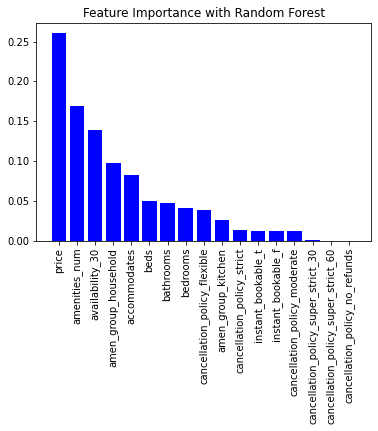

In [ ]:
plt.figure()
plt.title('Feature Importance with Random Forest')
y_pos = np.arange(len(FeatImpRFR.index[0:30]))
plt.bar(y_pos, FeatImpRFR['importance'].values[0:30], color='blue')
plt.xticks(y_pos, FeatImpRFR.index[0:30], rotation='vertical')
#plt.show()

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'feature importance rfr.svg'

plt.savefig(image_name, format=image_format, dpi=1200)

In [ ]:
#Feature importance
FeatImpXGB = pd.DataFrame({'feature': list(X.columns), 'importance': list(xgb_reg.feature_importances_)})
FeatImpXGB = FeatImpXGB.sort_values('importance', ascending=False)
#Set index to the field you want to sort the bar char by
FeatImpXGB = FeatImpXGB.set_index('feature')
FeatImpXGB.index[0:20]

Index(['cancellation_policy_flexible', 'accommodates',
       'cancellation_policy_strict', 'availability_30', 'bedrooms',
       'cancellation_policy_moderate', 'price', 'amen_group_household',
       'amenities_num', 'amen_group_kitchen', 'instant_bookable_f', 'beds',
       'bathrooms', 'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'instant_bookable_t',
       'cancellation_policy_no_refunds'],
      dtype='object', name='feature')

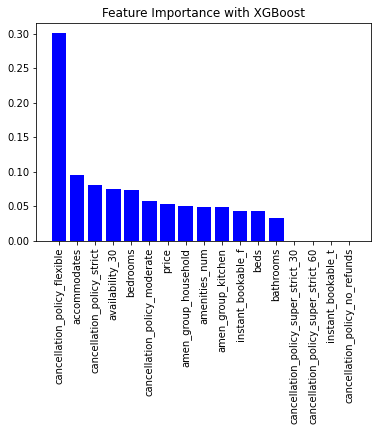

In [ ]:
plt.figure()
plt.title('Feature Importance with XGBoost')
y_pos = np.arange(len(FeatImpXGB.index[0:30]))
plt.bar(y_pos, FeatImpXGB['importance'].values[0:30], color='blue')
plt.xticks(y_pos, FeatImpXGB.index[0:30], rotation='vertical')
#plt.show()

image_format = 'svg' # e.g .png, .svg, etc.
image_name = 'feature importance xgb.svg'

plt.savefig(image_name, format=image_format, dpi=1200)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e6d3dd7-a3ce-422e-8f25-57163d804f84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>